In [94]:
import os
import sys
import yaml

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

dname = os.path.abspath('')
module_dir = os.path.abspath("{}/../deeplio".format(dname))
content_dir = os.path.abspath("{}/..".format(dname))
sys.path.append(dname)
sys.path.append(module_dir)
sys.path.append(content_dir)

from deeplio.datasets import KittiRawData

CONFIG_PATH = "{}/config.yaml".format(content_dir)
CHANNEL_NAMES = ['x', 'y', 'z', 'remission', 'rang', 'depth']

with open(CONFIG_PATH) as f:
    config = yaml.safe_load(f)

In [95]:
# extracting infos from config file

ds_config = config['datasets']
kitti_config = ds_config['kitti']
root_path = kitti_config['root-path']

ds_type = "train"
num_channels = len(CHANNEL_NAMES)

datasets = []
for date, drives in kitti_config[ds_type].items():
    for drive in drives:
        date = str(date).replace('-', '_')
        drive = '{0:04d}'.format(drive)
        datasets.append(KittiRawData(root_path, date, drive, ds_config))
        print("reading datset {}".format(datasets[-1].data_path))


reading datset /media/ajava/Data/Datasets/KITTI/2011_10_03/2011_10_03_drive_0027_extract
reading datset /media/ajava/Data/Datasets/KITTI/2011_10_03/2011_10_03_drive_0042_extract
reading datset /media/ajava/Data/Datasets/KITTI/2011_10_03/2011_10_03_drive_0034_extract
reading datset /media/ajava/Data/Datasets/KITTI/2011_09_30/2011_09_30_drive_0016_extract
reading datset /media/ajava/Data/Datasets/KITTI/2011_09_30/2011_09_30_drive_0018_extract
reading datset /media/ajava/Data/Datasets/KITTI/2011_09_30/2011_09_30_drive_0020_extract
reading datset /media/ajava/Data/Datasets/KITTI/2011_09_30/2011_09_30_drive_0027_extract


reading one image sample (index=210) from /media/ajava/Data/Datasets/KITTI/2011_09_30/2011_09_30_drive_0016_extract.
image shape:  (64, 1800, 6)


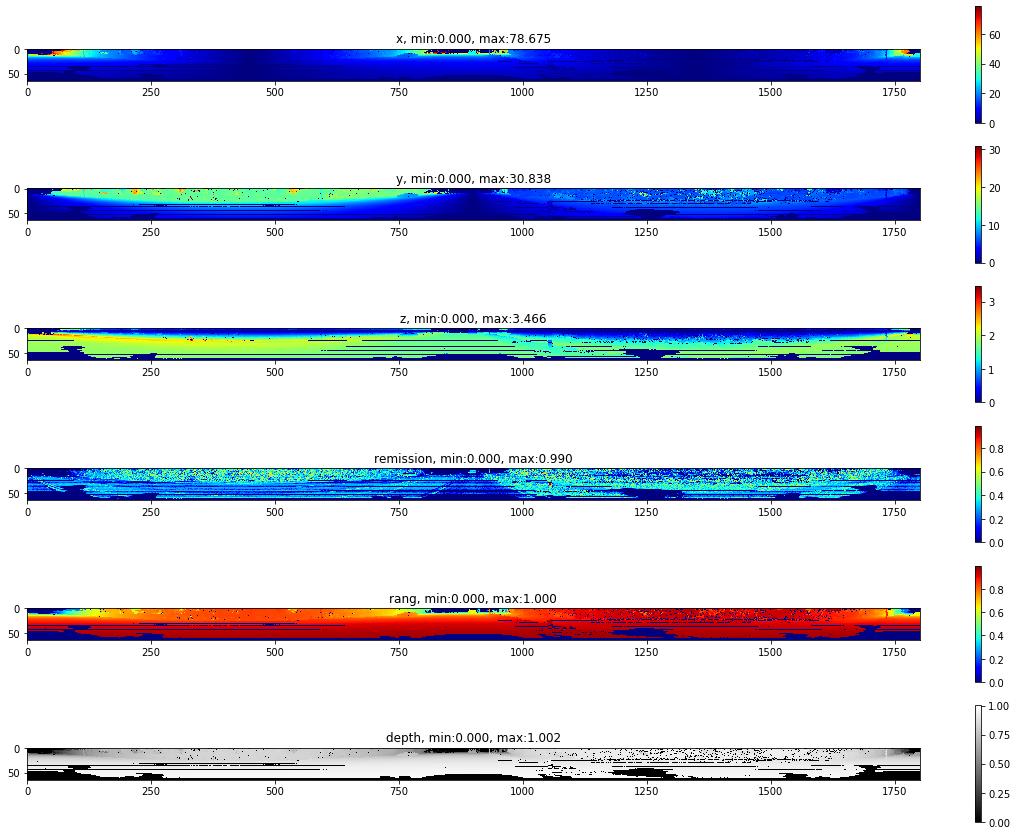

In [96]:
ds_idx = np.random.randint(0, len(datasets))
im_idx = np.random.randint(0, len(datasets[ds_idx]))

dataset = datasets[ds_idx] 
print("reading one image sample (index={}) from {}.".format(im_idx, dataset.data_path))

# get an sample image
im = dataset.get_velo_image(im_idx)

# convert negativ x, y, z coord. to postive
im = np.abs(im)

print("image shape: ", im.shape)

viridis = cm.get_cmap('viridis', 512)
gray = cm.get_cmap('gray', 1024)
jet = cm.get_cmap('jet', 1024)
CHANNEL_CMAP = [jet, jet, jet, jet, jet, gray]

fig, axes = plt.subplots(num_channels, 1, figsize=(20, 15))
for i in range(num_channels):
    ax = axes[i]
    img = im[:, :, i]
    ax.imshow(img, cmap=CHANNEL_CMAP[i])
    ax.set_title("{}, min:{:.3f}, max:{:.3f}".format(CHANNEL_NAMES[i], img.min(), img.max()))
    psm = ax.pcolormesh(img, cmap=CHANNEL_CMAP[i], rasterized=True, vmin=img.min(), vmax=img.max())
    fig.colorbar(psm, ax=ax)